# Contrastive learning density estimation

Author: Christoph Weniger, June 2020

In [1]:
import numpy as np
import pylab as plt
import swyft

In [2]:
DEVICE = 'cuda:0'
NDIM = 4  # Dimensionality of parameter z
NROUNDS = 3  # Optimization rounds

In [3]:
# Generative model, x~p(x|z)
def model(z, sigma = 0.01):
    x = abs(z*2-1)
    n = np.random.randn(*x.shape)*sigma
    return x + n

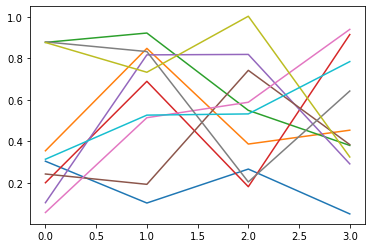

In [4]:
for i in range(10):
    z = np.random.rand(NDIM)
    x = model(z)
    plt.plot(x)

In [5]:
z0 = np.ones(NDIM)*0.25
x0 = model(z0, sigma = 0.0001)

In [6]:
z = swyft.sample_z(100000, NDIM)
xz = swyft.sample_x(model, z)

100%|██████████| 100000/100000 [00:01<00:00, 73378.61it/s]


In [ ]:
net = swyft.Network(NDIM, NDIM, xz_init = xz, p = 0.2)
net.to(DEVICE);
N_TRAIN = 20000

In [ ]:
net.train()
loss  = swyft.train(net, xz, n_steps = N_TRAIN, lr = 1e-3, n_particles = 1, device = DEVICE)

In [ ]:
net.train()
lnL = swyft.estimate_lnL(net, x0, z, device = DEVICE)
for i in range(4):
    pz = lnL[i]['z']
    py = lnL[i]['lnL']
    py_true = -(pz-0.5)**2/0.01**2/2
    plt.plot(pz, py, 'k')
#plt.plot(pz, py_true, lw = 2, color = 'r')
#plt.xlim([0.45, 0.55])
plt.ylim([-5, 0])

In [ ]:
loss += swyft.train(net, xz, n_steps = N_TRAIN, lr = 1e-4, n_particles = 1, device = DEVICE)

In [ ]:
net.train()
lnL = swyft.estimate_lnL(net, x0, z, device = DEVICE)
for i in range(4):
    pz = lnL[i]['z']
    py = lnL[i]['lnL']
    py_true = -(pz-0.5)**2/0.01**2/2
    plt.plot(pz, py, 'k')
#plt.plot(pz, py_true, lw = 2, color = 'r')
#plt.xlim([0.45, 0.55])
plt.ylim([-5, 0])

In [ ]:
loss += swyft.train(net, xz, n_steps = N_TRAIN, lr = 1e-5, n_particles = 1, device = DEVICE)

In [ ]:
net.train()
lnL = swyft.estimate_lnL(net, x0, z, device = DEVICE)
for i in range(4):
    pz = lnL[i]['z']
    py = lnL[i]['lnL']
    py_true = -(pz-0.5)**2/0.01**2/2
    plt.plot(pz, py, 'k')
#plt.plot(pz, py_true, lw = 2, color = 'r')
#plt.xlim([0.45, 0.55])
plt.ylim([-5, 0])

In [ ]:
net.eval()
lnL = swyft.estimate_lnL(net, x0, z, device = DEVICE)
for i in range(4):
    pz = lnL[i]['z']
    py = lnL[i]['lnL']
    py_true = -(pz-0.5)**2/0.01**2/2
    plt.plot(pz, np.exp(py), 'k')
#plt.plot(pz, np.exp(py_true)*0.95, lw = 2, color = 'r')
plt.xlim([0.7, 0.8])
#plt.ylim([-2, 0])